# Conclusions

In this notebook, the results obtained in the LSTM model will be analysed. To do so, the predictions of the model will be analysed and it will be seen if there are dependencies in the quality of its prediction with the rest of the variables.

**Import libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [4]:
df = pd.read_csv('full_dataset_predictions.csv', sep=';')

In [11]:
y_true = list(df.Sentiment)
y_pred = list(df.Prediction)
good = []
for i in range(len(y_true)):
    if y_true[i] == y_pred[i]:
        good.append('Good')
    else:
        good.append('Bad')
df['Result'] = good
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment,Prediction,Result
0,670772142,4,2019-4,Australia,If youve ever been to Disneyland anywhere youl...,Disneyland_HongKong,1,1,Good
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,1,0,Bad
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid when...,Disneyland_HongKong,1,1,Good
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park Unfortun...,Disneyland_HongKong,1,1,Good
4,670607296,4,2019-4,United Kingdom,the location is not in the city took around 1 ...,Disneyland_HongKong,1,1,Good


In [60]:
df[['Year', 'Month']] = df['Year_Month'].str.split('-', expand=True)

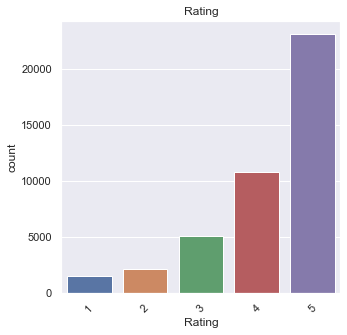

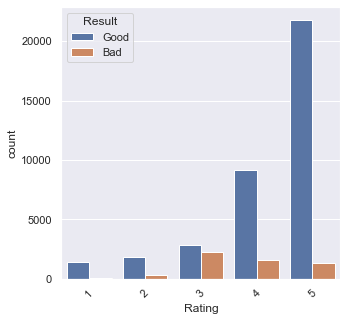

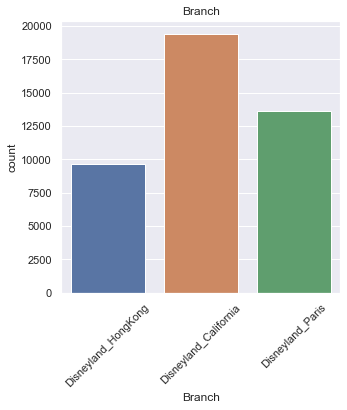

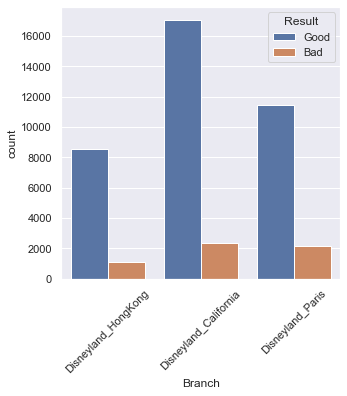

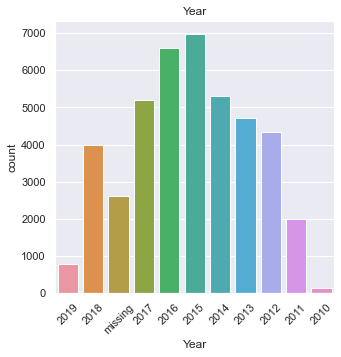

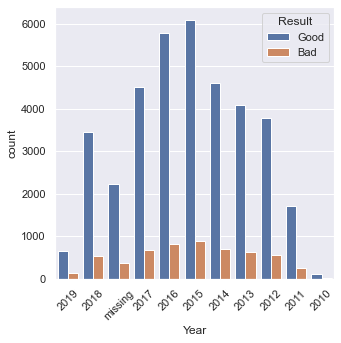

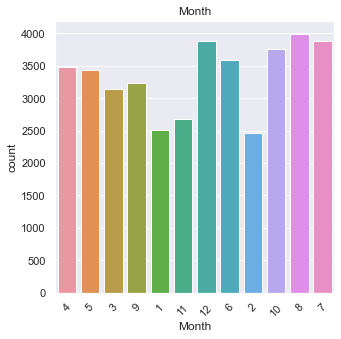

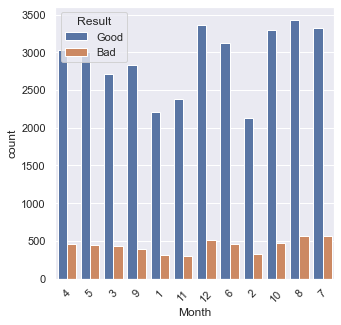

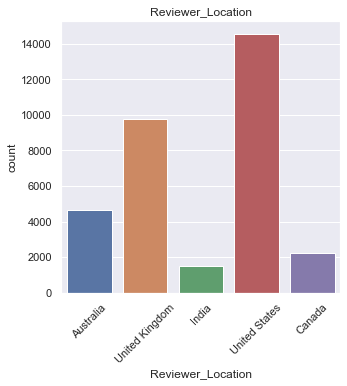

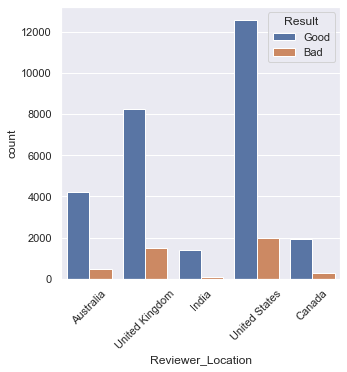

In [63]:
sns.set_theme(style="darkgrid")

categorical = ['Rating','Branch','Year', 'Month','Result']
df_categorical = df[categorical]

for i in range(len(categorical)-1):
    plt.figure(figsize=(5, 5))
    plt.title(categorical[i])
    #plt.subplot(1, 2, 1)
    ax1 = sns.countplot(x=categorical[i], data=df_categorical)
    ax1.tick_params(axis='x', rotation=45)


    plt.figure(figsize=(5, 5))
    #plt.subplot(1, 2, 2)
    ax2 = sns.countplot(x=categorical[i], hue="Result", data=df_categorical)
    ax2.tick_params(axis='x', rotation=45)
    
    
## Top Reviewer 

top_Reviewer_Location = list(df['Reviewer_Location'].value_counts().index)[:5]

df_top_Reviewer_Location = df[(df['Reviewer_Location'] == top_Reviewer_Location[0]) | 
   (df['Reviewer_Location'] == top_Reviewer_Location[1]) | 
   (df['Reviewer_Location'] == top_Reviewer_Location[2]) | 
   (df['Reviewer_Location'] == top_Reviewer_Location[3]) | 
   (df['Reviewer_Location'] == top_Reviewer_Location[4])]
categorical = ['Reviewer_Location','Result']
df_categorical = df_top_Reviewer_Location[categorical]

sns.set_theme(style="darkgrid")

for i in range(len(categorical)-1):
    plt.figure(figsize=(5, 5))
    plt.title(categorical[i])
    #plt.subplot(1, 2, 1)
    ax1 = sns.countplot(x=categorical[i], data=df_categorical)
    ax1.tick_params(axis='x', rotation=45)


    plt.figure(figsize=(5, 5))
    #plt.subplot(1, 2, 2)
    ax2 = sns.countplot(x=categorical[i], hue="Result", data=df_categorical)
    ax2.tick_params(axis='x', rotation=45)

* **Rating**: It can be seen that when rating takes the value 3, the number of failures is almost equal to the number of successes. This makes sense since 3 is in between the bad and good rating class. As a future line of work, one could try to increase the number of classes to 3 with the middle class taking this rating or try not to include them for training the model since there are a mix of positive and negative reviews within this class.

* **Branch**: It is noted that although the data for Disneyland Paris is smaller than that for California, the number of failures to classify is almost the same, making the Paris comments more difficult to classify by the model.

* **Year**: The model classifies with the same hit/fail ratio irrespective of the year. 

* **Month**: The model classifies with the same hit/fail ratio irrespective of the month. 

* **Reviewer Location**: The 5 countries with the most comments have been selected for this study. These were Australia, United Kingdom, India, United States and Canada. Although they all have a similar ratio, if we compare the United Kingdom with the United States, we can see that the error in prediction is greater for the former. This may be due to the fact that there are differences in the way they express themselves despite being the same language.
